In [4]:
!pip -q install yellowbrick

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier

In [6]:
import pickle
with open('tenis.pkl','rb') as f:
  x_treino, x_teste, y_treino, y_teste = pickle.load(f)

| Gini measures the impurity of the node in a decision tree

In [7]:
modelo = DecisionTreeClassifier(criterion="entropy")
modelo.fit(x_treino, y_treino)

DecisionTreeClassifier(criterion='entropy')

**Vamos testar o modelo?**

In [8]:
previsoes = modelo.predict(x_teste)

In [9]:
previsoes

array(['no', 'yes', 'no'], dtype=object)

**Será que o modelo acertou?**

In [10]:
y_teste

array(['yes', 'yes', 'yes'], dtype=object)

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy:", accuracy_score(y_teste,previsoes))

Accuracy: 0.3333333333333333


In [12]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_teste, previsoes)

array([[0, 0],
       [2, 1]], dtype=int64)

**Accuracy and Confusion_Matrix**

0.3333333333333333

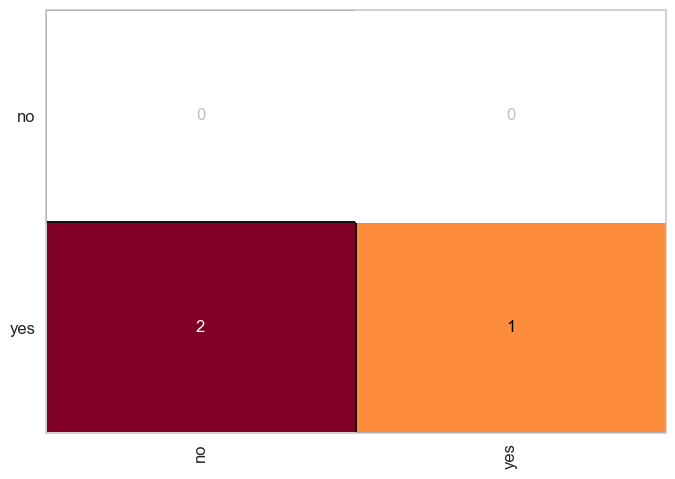

In [13]:
cm = ConfusionMatrix(modelo)
cm.fit(x_treino, y_treino)
cm.score(x_teste, y_teste)

**Métricas do modelo**

In [14]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

          no       0.00      0.00      0.00         0
         yes       1.00      0.33      0.50         3

    accuracy                           0.33         3
   macro avg       0.50      0.17      0.25         3
weighted avg       1.00      0.33      0.50         3



c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

**Visualizing the decision tree**

| Importing libraries

In [15]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

In [16]:
dot_data = StringIO()
export_graphviz(modelo, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tenis.png')
Image(graph.create_png())

InvocationException: GraphViz's executables not found